In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Data

In [89]:
dataset=pd.read_csv("daily_wholesale_price_Onion-upto_apr_2015.csv")
dataset.head()

,Date,Centre_Name,Commodity_Name,Price
0,01-01-09,CHANDIGARH,Onion,NaN
1,01-01-09,DELHI,Onion,1025.0
2,01-01-09,SHIMLA,Onion,NaN
3,01-01-09,SRINAGAR,Onion,NaN
4,01-01-09,JAMMU,Onion,NaN


In [90]:
dataset.Centre_Name.unique()

array(['CHANDIGARH', 'DELHI', 'SHIMLA', 'SRINAGAR', 'JAMMU', 'AMRITSAR',
       'LUDHIANA', 'LUCKNOW', 'DEHRADUN', 'RAIPUR', 'AHMEDABAD', 'BHOPAL',
       'MUMBAI', 'JAIPUR', 'PATNA', 'RANCHI', 'BHUBANESHWAR', 'KOLKATA',
       'GUWAHATI', 'SHILLONG', 'AIZWAL', 'KOHIMA', 'AGARTALA',
       'BENGALURU', 'T.PURAM', 'CHENNAI', 'HYDERABAD', 'KANPUR',
       'VIJAYWADA', 'RAJKOT', 'DINDIGUL', 'HISAR', 'KARNAL', 'MANDI',
       'BATHINDA', 'VARANASI', 'AGRA', 'INDORE', 'NAGPUR', 'JODHPUR',
       'KOTA', 'BHAGALPUR', 'CUTTACK', 'SAMBALPUR', 'SILIGURI',
       'ITANAGAR', 'DIMAPUR', 'DHARWAD', 'THIRUCHIRAPALLI', 'ERNAKULAM',
       'PORT BLAIR', 'PUDUCHERRY', 'PANAJI', 'GWALIOR', 'JABALPUR',
       'KOZHIKODE', 'ROURKELA', 'VISAKHAPATNAM', 'PANCHKULA', 'GURGAON',
       'REWA', 'SAGAR', 'COIMBATORE', 'TIRUNELVELI', 'PURNIA', 'THRISSUR',
       'PALAKKAD', 'WAYANAD', 'HALDWANI', 'DHARAMSHALA', 'MANGALORE',
       'MYSORE'], dtype=object)

In [91]:
dataset=pd.read_csv("daily_wholesale_price_Onion-upto_apr_2015.csv",index_col="Date",parse_dates=["Date"])
dataset.head()

,Centre_Name,Commodity_Name,Price
Date,,,
2009-01-01,CHANDIGARH,Onion,NaN
2009-01-01,DELHI,Onion,1025.0
2009-01-01,SHIMLA,Onion,NaN
2009-01-01,SRINAGAR,Onion,NaN
2009-01-01,JAMMU,Onion,NaN


# Filter Data (Centre_Name=HYDERABAD)

In [92]:
Hyd_db=pd.DataFrame(dataset.loc[dataset.Centre_Name=="HYDERABAD"]["Price"]) 
Hyd_db.head()

,Price
Date,
2009-01-01,NaN
2009-02-01,NaN
2009-05-01,NaN
2009-06-01,NaN
2009-07-01,NaN


In [93]:
Hyd_db.shape

(1554, 1)

In [94]:
Hyd_db.describe()

,Price
count,1271.000000
mean,1661.200629
std,1010.979839
min,400.000000
25%,900.000000
50%,1400.000000
75%,2200.000000
max,6700.000000


In [168]:
Hyd_db.isna().sum()

Price    283
dtype: int64

In [177]:
Hyd_db.loc[:"31-12-2009"]["Price"].isna().sum()

225

    In my data set Onion Price Data Analysis
    (Market=HYDERABAD) data(2009-2015 daily)
    I got 283 NAN out of 283 there are 225 NAN 
    present in year 2009 

In [97]:
1554/365

4.257534246575342

# Visualization 
    In 2019 lot of daily data is missing only few records are present  

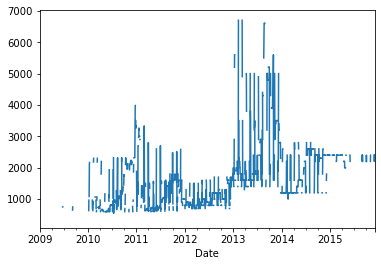

In [98]:
Hyd_db.Price.resample("D").mean().plot()

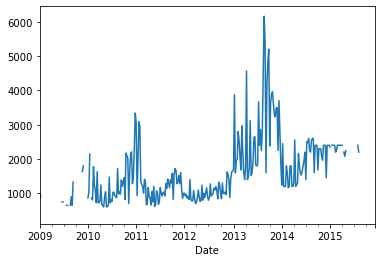

In [99]:
Hyd_db.Price.resample("W").mean().plot()

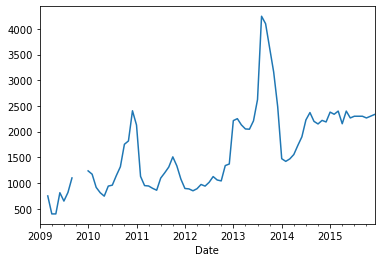

In [100]:
Hyd_db.Price.resample("M").mean().plot()

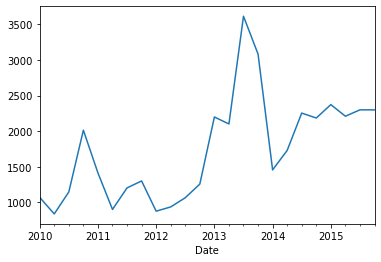

In [22]:
Hyd_db.Price.resample("Q").mean().plot()

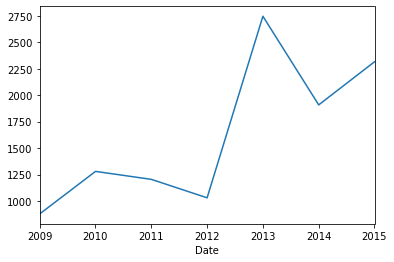

In [101]:
Hyd_db.Price.resample("Y").mean().plot()

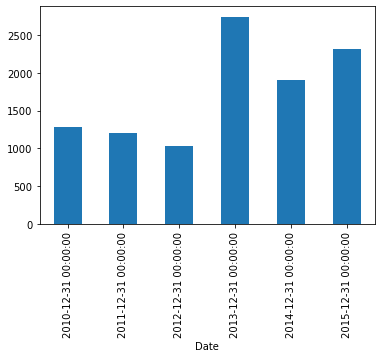

In [24]:
Hyd_db.Price.resample('Y').mean().plot(kind="bar")

# Year Wise vs Monthly Data Analysis

In [102]:
Hyd_db.reset_index(inplace=True)

In [103]:
Hyd_db['year'] = [d.year for d in Hyd_db.Date]
Hyd_db['month'] = [d.month for d in Hyd_db.Date]
years = Hyd_db['year'].unique()

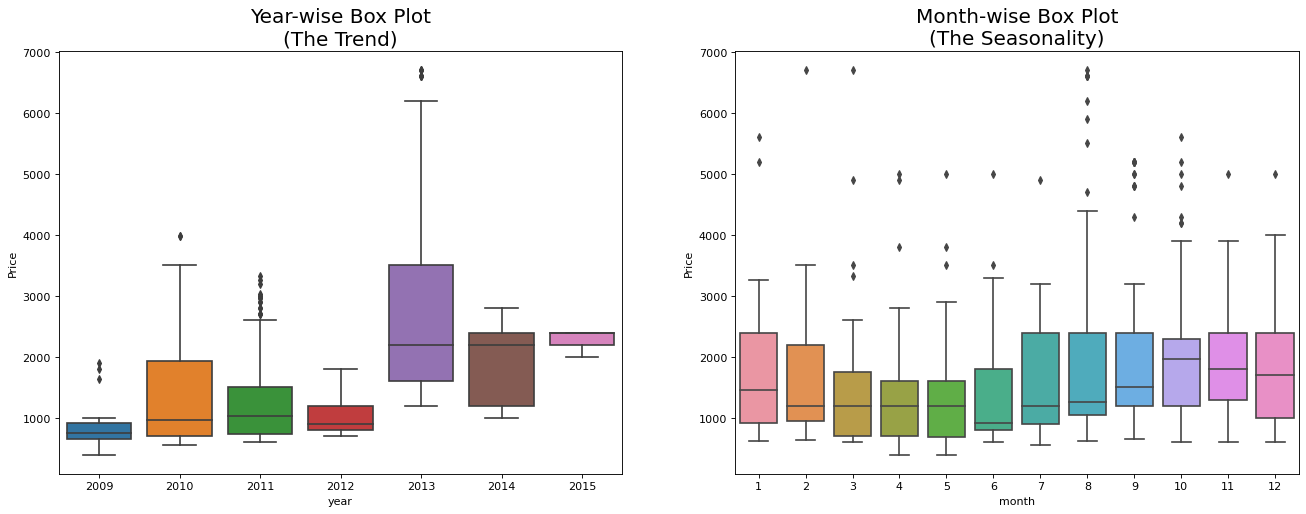

In [104]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Price', data=Hyd_db, ax=axes[0])
sns.boxplot(x='month', y='Price', data=Hyd_db,ax=axes[1])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [68]:
# Hyd_db.to_csv("Hyd_db")

In [53]:
df=Hyd_db.dropna()
df.index=df.Date
df.drop(["Date"],axis=1,inplace=True)
df.head()

/home/uday/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Price,year,month
Date,,,
2010-01-02,867.0,2010,1
2010-02-02,967.0,2010,2
2010-03-02,967.0,2010,3
2010-04-02,967.0,2010,4
2010-08-02,1267.0,2010,8


In [71]:
df=pd.read_csv("Hyd_db",parse_dates=["Date"],index_col="Date")
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.head()

,Price,year,month
Date,,,
2010-01-02,867.0,2010,1
2010-02-02,967.0,2010,2
2010-03-02,967.0,2010,3
2010-04-02,967.0,2010,4
2010-05-02,NaN,2010,5


In [79]:
df1=pd.DataFrame(df.Price.copy())
df1.dropna(inplace=True)
df1.head()

,Price
Date,
2010-01-02,867.0
2010-02-02,967.0
2010-03-02,967.0
2010-04-02,967.0
2010-08-02,1267.0


In [73]:
df.dropna(inplace=True)

# Multiplicative and Additive Decompose

In [151]:
dataset=pd.read_csv("daily_wholesale_price_Onion-upto_apr_2015.csv",index_col="Date",parse_dates=["Date"])
Hyd_db=pd.DataFrame(dataset.loc[dataset.Centre_Name=="HYDERABAD"]["Price"]) 
Hyd_db.head()

,Price
Date,
2009-01-01,NaN
2009-02-01,NaN
2009-05-01,NaN
2009-06-01,NaN
2009-07-01,NaN


In [169]:
df_monthly=pd.DataFrame(Hyd_db.Price.resample("w").mean(),)
df_monthly.head()

,Price
Date,
2009-01-04,1000.0
2009-01-11,900.0
2009-01-18,NaN
2009-01-25,NaN
2009-02-01,NaN


In [170]:
df_monthly.dropna(inplace=True)

In [171]:
df_monthly.reset_index(inplace=True)

/home/uday/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


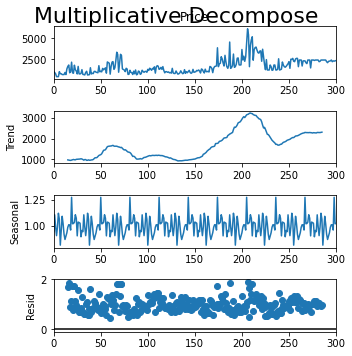

In [172]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

result_mul = seasonal_decompose(df_monthly.Price,  model='multiplicative',freq=31)
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
plt.show()

/home/uday/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


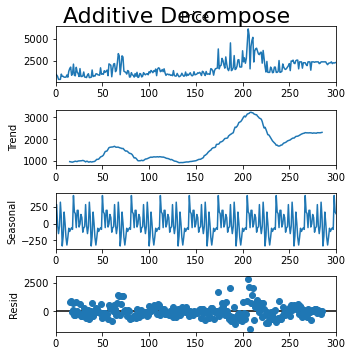

In [174]:
result_add = seasonal_decompose(df_monthly['Price'],  model='additive',freq=31)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

# Prophet

In [107]:
Hyd_db.head()

,Date,Price,year,month
0,2009-01-01,NaN,2009,1
1,2009-02-01,NaN,2009,2
2,2009-05-01,NaN,2009,5
3,2009-06-01,NaN,2009,6
4,2009-07-01,NaN,2009,7


In [108]:
Hyd_db.shape

(1554, 4)

In [106]:
from fbprophet import Prophet

In [114]:
Hyd_db.rename(columns={'Date': 'ds','Price': 'y'},inplace=True)
Hyd_db.head()

,ds,y,year,month
0,2009-01-01,NaN,2009,1
1,2009-02-01,NaN,2009,2
2,2009-05-01,NaN,2009,5
3,2009-06-01,NaN,2009,6
4,2009-07-01,NaN,2009,7


In [122]:
df=pd.DataFrame(data=Hyd_db[["ds","y"]])
df.head()

,ds,y
0,2009-01-01,NaN
1,2009-02-01,NaN
2,2009-05-01,NaN
3,2009-06-01,NaN
4,2009-07-01,NaN


# Prophet Model Fit

In [123]:
m = Prophet()
model = m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [124]:
print(model.__doc__)

Prophet forecaster.

    Parameters
    ----------
    growth: String 'linear' or 'logistic' to specify a linear or logistic
        trend.
    changepoints: List of dates at which to include potential changepoints. If
        not specified, potential changepoints are selected automatically.
    n_changepoints: Number of potential changepoints to include. Not used
        if input `changepoints` is supplied. If `changepoints` is not supplied,
        then n_changepoints potential changepoints are selected uniformly from
        the first `changepoint_range` proportion of the history.
    changepoint_range: Proportion of history in which trend changepoints will
        be estimated. Defaults to 0.8 for the first 80%. Not used if
        `changepoints` is specified.
    yearly_seasonality: Fit yearly seasonality.
        Can be 'auto', True, False, or a number of Fourier terms to generate.
    weekly_seasonality: Fit weekly seasonality.
        Can be 'auto', True, False, or a number of 

In [125]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
1579,2015-12-29
1580,2015-12-30
1581,2015-12-31
1582,2016-01-01
1583,2016-01-02


In [126]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1579,2015-12-29,2097.761498,1125.028360,3093.468117
1580,2015-12-30,2090.293410,1051.234517,3024.891359
1581,2015-12-31,2128.437511,1139.652452,3149.515893
1582,2016-01-01,2087.979809,1101.183632,3104.960919
1583,2016-01-02,2181.038852,1182.095849,3166.634673


# Plot the Prophet forecast.
    m.plot(forecast)
    Signature:
    m.plot(
        fcst,
        ax=None,
        uncertainty=True,
        plot_cap=True,
        xlabel='ds',
        ylabel='y',
        figsize=(10, 6),
    )
    Docstring:
    Plot the Prophet forecast.

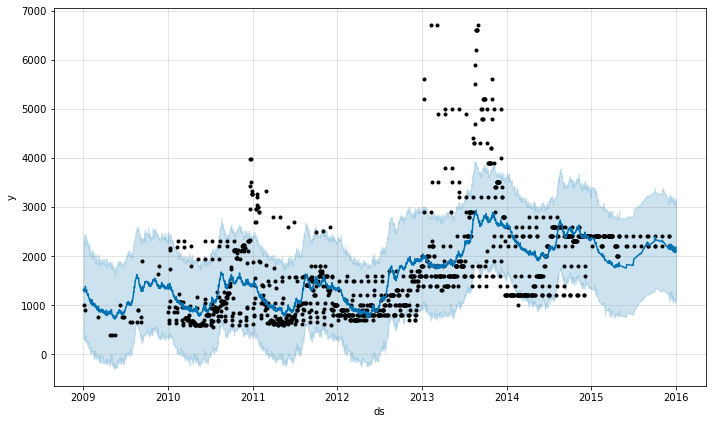

In [127]:
fig1 = m.plot(forecast)

# Plot the Prophet forecast components. 
    Signature:
    m.plot_components(
        fcst,
        uncertainty=True,
        plot_cap=True,
        weekly_start=0,
        yearly_start=0,
        figsize=None,
    )
    Docstring:
    Plot the Prophet forecast components.

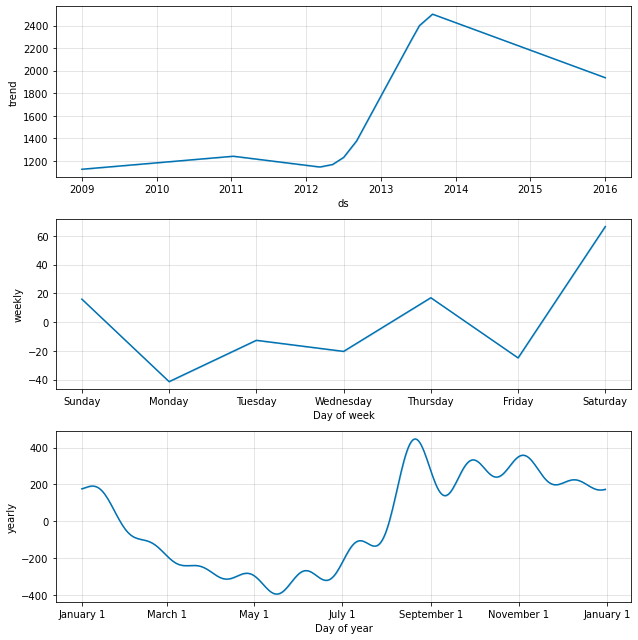

In [128]:
fig2 = m.plot_components(forecast)

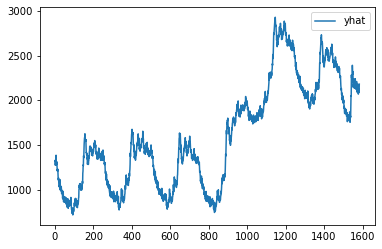

In [129]:
df1 = forecast[[ 'yhat']]
df1.plot()

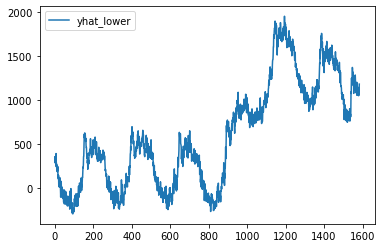

In [130]:
df1 = forecast[[ 'yhat_lower']]
df1.plot()

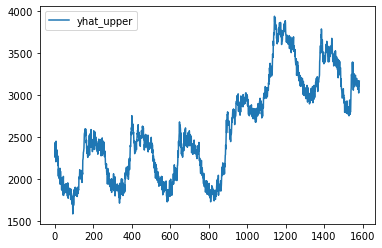

In [131]:
df1 = forecast[[ 'yhat_upper']]
df1.plot()

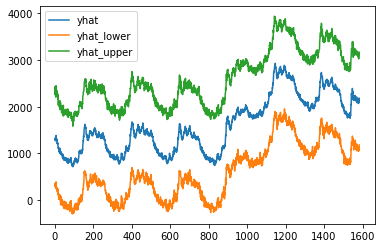

In [132]:
df1 = forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']]
df1.plot()

# Combining All Result

/home/uday/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/uday/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


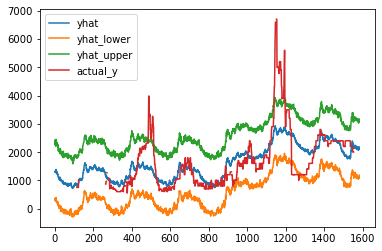

In [133]:
df1 = forecast[[ 'yhat', 'yhat_lower', 'yhat_upper']]
df1.loc[:,'actual_y'] = df.y
df1.plot()

# End of Notebook